In [1]:
from keras import backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout
from keras.layers.merge import add
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.callbacks import ModelCheckpoint

import numpy as np
import h5py
import string
import pickle

%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image

Using TensorFlow backend.


In [2]:
meta_info = {
    'input_shape': {
        'VGG16': 4096, 'VGG19': 4096, 'ResNet50': 4096,
        'InceptionV3': 2048,
        'InceptionResNetV2': 1536
    },
    'n_embeddeing': 512,
    'n_vocabs': 7277,
    'M': 36,
    'text_dir': 'Flickr8k_text/'
}

In [3]:
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)
print(len(tokenizer.word_index))

7276


In [4]:
def model_select(model_name):
    if model_name == 'VGG16':
        from keras.applications.vgg16 import VGG16, preprocess_input
        # load the model
        model = VGG16() # 4096
    elif model_name == 'VGG19':
        from keras.applications.vgg19 import VGG19, preprocess_input 
        # load the model
        model = VGG19() # 4096
    elif model_name == 'ResNet50':
        from keras.applications.resnet50 import ResNet50, preprocess_input
        # load the model
        model = ResNet50() # 4096
    elif model_name == 'InceptionV3':
        from keras.applications.inception_v3 import InceptionV3, preprocess_input
        # load the model
        model = InceptionV3() # 2048,
    elif model_name == 'InceptionResNetV2':
        from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
        # load the model
        model = InceptionResNetV2() # 1536,
    return model

In [5]:
# Generate caption from input feature
def generate_caption(model, tokenizer, img):
    # start sign
    generated = ['sssss']
    # Loop for max length or end sign('eeeee')
    for i in range(meta_info['M']):
        sequence = tokenizer.texts_to_sequences([generated])[0]
        sequence = pad_sequences([sequence], maxlen=meta_info['M'])
        # Predict next word
        y_pred = model.predict([img, sequence], verbose=0)
        y_pred = np.argmax(y_pred)

        word_pred = 'eeeee'
        for word, i in tokenizer.word_index.items():
            if i == y_pred:
                word_pred = word
        
        # Generate sentence
        generated.append(word_pred)
        # If end sign, break
        if word_pred == 'eeeee':
            break
    return generated

In [6]:
def generate_example(cnn_model, final_model, img_path, tokenizer):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    # print(img.shape)
    feature = cnn_model.predict(img)
    
    model = load_model(final_model)
    caption = generate_caption(model, tokenizer, feature)
    caption.pop(0)
    caption.pop()
    return caption

In [7]:
# Display in jupyter notebook cell
# ref: https://stackoverflow.com/questions/39416004/matplotlib-not-displaying-image-on-jupyter-notebook
def show_img(file):
    img = Image.open(file, 'r')
    imshow(np.asarray(img))

In [8]:
base_model = model_select('VGG19')
cnn_model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)
# cnn_model.summary()

Instructions for updating:
Colocations handled automatically by placer.


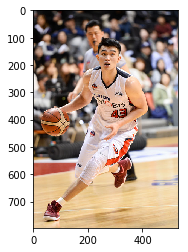

In [9]:
show_img('examples/example0.jpg')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
a basketball player is dribbling the ball


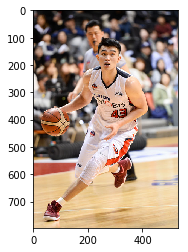

In [10]:
final_model_file = 'transfer.model.ep001.acc0.3872.h5'
img_file = 'examples/example0.jpg'

caption = generate_example(cnn_model, final_model_file, img_file, tokenizer)
caption = ' '.join(caption)
show_img(img_file)
print(caption)

a soccer player in a blue and white uniform is running on a soccer field


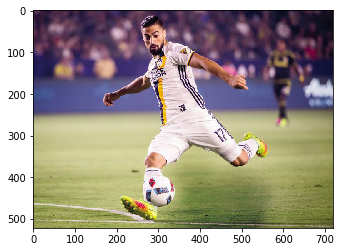

In [11]:
img_file = 'examples/example1.jpg'

caption = generate_example(cnn_model, final_model_file, img_file, tokenizer)
caption = ' '.join(caption)
show_img(img_file)
print(caption)

a dog is running through the grass


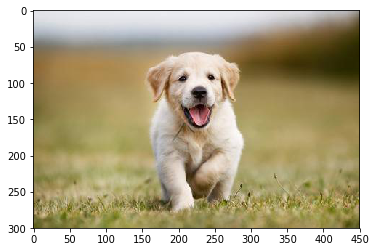

In [12]:
img_file = 'examples/example2.jpg'

caption = generate_example(cnn_model, final_model_file, img_file, tokenizer)
caption = ' '.join(caption)
show_img(img_file)
print(caption)

a dog is running through the water


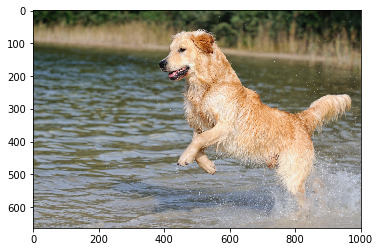

In [13]:
img_file = 'examples/example3.jpg'

caption = generate_example(cnn_model, final_model_file, img_file, tokenizer)
caption = ' '.join(caption)
show_img(img_file)
print(caption)